### Applying spatial filtering for blurring/noise reduction 

In [1]:
import cv2
from PIL import Image
import numpy as np

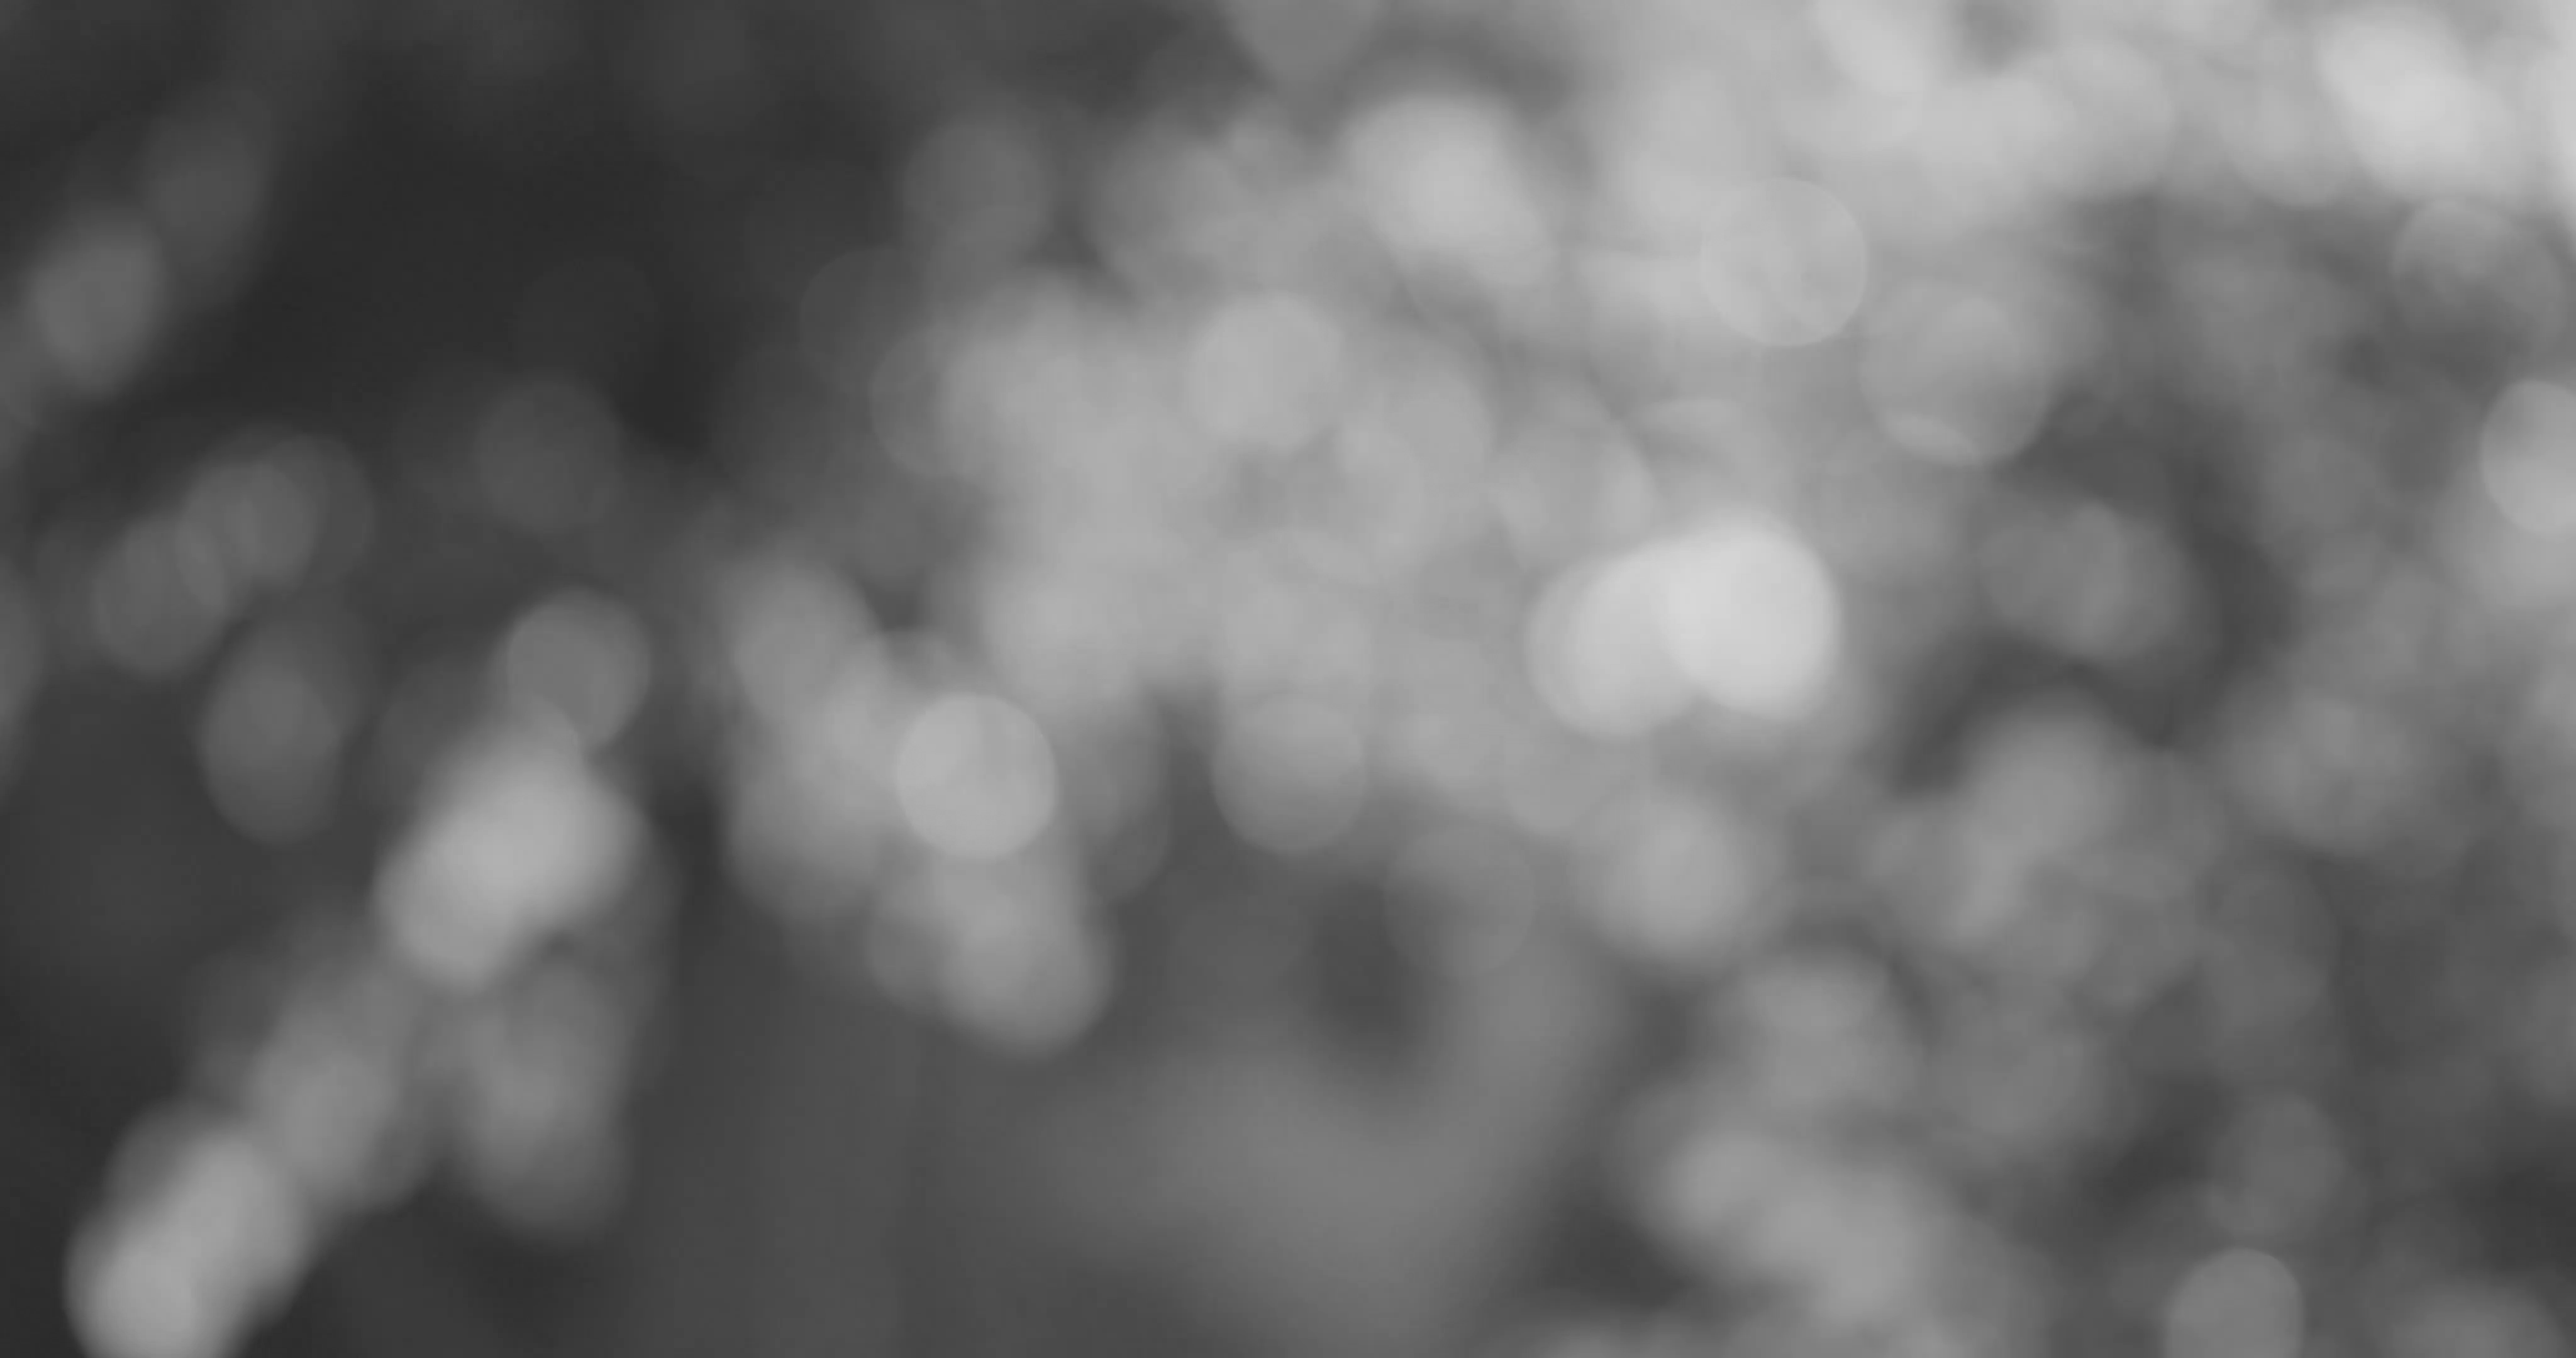

In [2]:
img = cv2.imread('bimage.png', 2)
Image.fromarray(img)

In [3]:
arrayfilter = np.ones((3,3)) * 1/9
[height, width] = img.shape
newimg          = np.zeros(img.shape, np.int8)

In [4]:
arraytemp       = np.zeros((3,3), np.int8)
[a,b]           = arraytemp.shape
b               = (a-1) / 2
# Refer to slide 15
aaxis           = np.linspace(-b,b,a).astype(np.int8)
baxis           = np.linspace(-b,b,a).astype(np.int8)

In [ ]:
for y in range(height):
    for x in range(width):
        
        for s in aaxis:
            for t in baxis:
                
                if (y+s) < 0 and (x+t) < 0:
                    temp = img[y][x]
                elif (y+s) > 0 and (x+t) > 0:
                    temp = img[y][x]
                elif (y+s) < 0:
                    temp = img[y][x]
                elif (x+t) < 0:
                    temp = img[y][x]
                elif (y+s) > 0:
                    temp = img[y][x]
                elif (x+t) > 0:
                    temp = img[y][x]                    
                else:
                    temp = img[y+s][x+t]
                arraytemp[s+b][t+b] = arrayfilter[s+b][t+b] * temp
        
        newimg[y][x] = arraytemp.sum()
                
                
        

In [ ]:
Image.fromarray(newimg)